## Barplot matrices of summer water quality testing

1. Summer 2016 and 2017
2. Joint project citizen science Hackuarium/hammerdirt

### Usage:

1. Graphics for citizen science article
2. Output for web application
3. You may use give us the credit

### Contact and further information

1. roger@hammerdirt.ch
2. https://mwshovel.pythonanywhere.com/dirt/microbiology.html
3. http://wiki.hackuarium.ch/w/Main_Page



In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import re
import seaborn
import textwrap
import matplotlib.patches as mpatches

## Get the 2017 data:

#### We are working from the original csv

We will need to do the following:

1. Dates formatted
2. Duplicates removed
3. Errors corrected

#### see the workbook "Initial sorting and cat herding"

In [7]:
a = pd.read_csv('data/2017_Data.csv')

In [8]:
a.iloc[12]

Date                  26.06.17
Location             Echandens
medium                easy_gel
Samples                      1
Sampling_Notes     No comments
                      ...     
P3_48h_other               0.0
Comments_p3_48h    No comments
latitude             46.534677
longitude               6.5396
Location_Image            none
Name: 12, Length: 71, dtype: object

In [9]:
# this is a duplicate value in the DF, the data was moved and then added as a record)
# so we need to get rid of that:
a.drop(12, inplace=True)
# there is a column name that doesn't match the others
a.rename(columns={'p3_fluo_halo_colonies':'P3_fluo_halo_colonies'}, inplace=True)
# there is a sample number for a record where no samples weere taken, we need to fix that:
a.loc[(a.Location == 'MRD') & (a.Date == '24.07.17'), "Samples"] = 0

In [10]:
a.loc[(a.Location == 'MRD') & (a.Date == '24.07.17')]

,Date,Location,medium,Samples,Sampling_Notes,Water_temp,Plating_notes,Temp_incubation,P1_qty_sample,Image_24h_fluo_plate_one,...,P3_48h_big_blue,P3_48h_med_blue,P3_48h_green,P3_48h_turq,P3_48h_pink,P3_48h_other,Comments_p3_48h,latitude,longitude,Location_Image
45,24.07.17,MRD,easy_gel,0,"Waves at site, sampling not effective",0,No comments,37,4.0,none,...,0.0,0.0,0.0,0.0,0.0,0.0,No comments,46.431662,6.908962,1500895656638.jpg


In [11]:
# b = pd.read_csv('data/2017_Data/rain2017.csv')

### Create the categories/criteria for analysis/comparison

1. Create labels for chart output
2. Link column names to chart labels
2. Create lists of unique values for categories/criteria

#### Get the unique dates:

In [12]:
dates = list(a.Date.unique())
dates

['12.06.17',
 '19.06.17',
 '26.06.17',
 '03.07.17',
 '10.07.17',
 '17.07.17',
 '24.07.17',
 '31.07.17']

#### Get the locations of interest:

In [13]:
locations = ['VNX', 'SVT',  'MRD']
locations

['VNX', 'SVT', 'MRD']

#### Get the culture media:

In [14]:
mediums = list(a['medium'].unique().copy())
mediums

['easy_gel', 'micrology_card', 'unil_kitchen', 'levine']

#### Get the 24hour results:

In [15]:
twentyFourHour = ['Date', 'Location', 'medium', 'Samples', 'Sampling_Notes', 'Water_temp', 'Plating_notes', 'Temp_incubation', 'P1_qty_sample', 'P1_fluo_halo_colonies', 'Plate_one_24h_image', 'P1_24h_big_blue', 'P1_24h_med_blue', 'P1_24h_green', 'P1_24h_turq', 'P1_24h_pink', 'P1_24h_other', 'Comments_p1_24h','P2_qty_sample','P2_fluo_halo_colonies', 'Plate_two_24h_image', 'P2_24h_big_blue', 'P2_24h_med_blue', 'P2_24h_green', 'P2_24h_turq', 'P2_24h_pink', 'P2_24h_other', 'Comments_p2_24h', 'P3_qty_sample', 'P3_fluo_halo_colonies', 'Plate_three_24h_image', 'P3_24h_big_blue', 'P3_24h_med_blue', 'P3_24h_green', 'P3_24h_turq', 'P3_24h_pink', 'P3_24h_other', 'Comments_p3_24h']

In [16]:
twntyFor2017 = a[twentyFourHour]

#### Get the 48hour results:

In [17]:
fortyEightHour = ['Date','Location','medium','Samples','Sampling_Notes','Water_temp','Plating_notes','Temp_incubation','P1_qty_sample','P1_fluo_halo_colonies','Plate_one_48h_image','P1_48h_big_blue','P1_48h_med_blue','P1_48h_green','P1_48h_turq','P1_48h_pink','P1_48h_other','Comments_p1_48h','P2_qty_sample','P2_fluo_halo_colonies', 'Plate_two_48h_image','P2_48h_big_blue','P2_48h_med_blue','P2_48h_green', 'P2_48h_turq', 'P2_48h_pink','P2_48h_other','Comments_p2_48h','P3_qty_sample','P3_fluo_halo_colonies','Plate_three_48h_image','P3_48h_big_blue','P3_48h_med_blue', 'P3_48h_green','P3_48h_turq', 'P3_48h_pink','P3_48h_other', 'Comments_p3_48h']

In [18]:
frtyEght2017 = a[fortyEightHour]

#### Create week labels and categories

In [19]:
weekLabels = ['Week one', 'Week two', 'Week three', 'Week four', 'Week five', 'Week six', 'Week seven', 'Week eight']

In [20]:
# map the labels to the weeks
# we will be comparing the weekly results from one year to the next
# this will allow us to call results by week number
weeksDates = dict(zip(weekLabels, dates))
# inverse this relationship 
datesWeeks = {value:key for key, value in weeksDates.items()}

#### Example: A dictionary that has the week number as key and the date of the sample as value

In [21]:
weeksDates["Week two"]

'19.06.17'

#### Create labels for colony colors

1. Make a dictionary that ties column name to color
2. Eliminate the plate reference
3. Used to label charts

In [22]:
# create keys for charting labels
platesColors = ['P1_fluo_halo_colonies','P1_48h_big_blue','P1_48h_med_blue','P1_48h_green','P1_48h_turq','P1_48h_pink','P1_48h_other','P2_fluo_halo_colonies', 'P2_48h_big_blue','P2_48h_med_blue','P2_48h_green', 'P2_48h_turq', 'P2_48h_pink','P2_48h_other','P3_fluo_halo_colonies','P3_48h_big_blue','P3_48h_med_blue', 'P3_48h_green','P3_48h_turq', 'P3_48h_pink','P3_48h_other','P1_fluo_halo_colonies','P1_24h_big_blue', 'P1_24h_med_blue', 'P1_24h_green', 'P1_24h_turq', 'P1_24h_pink', 'P1_24h_other','P2_fluo_halo_colonies','P2_24h_big_blue', 'P2_24h_med_blue', 'P2_24h_green', 'P2_24h_turq', 'P2_24h_pink', 'P2_24h_other','P3_fluo_halo_colonies','P3_24h_big_blue', 'P3_24h_med_blue', 'P3_24h_green', 'P3_24h_turq', 'P3_24h_pink', 'P3_24h_other']

def makeKeys(a):
    b = re.compile('fluo_halo', re.IGNORECASE)
    c={}
    for d,e in enumerate(a):
        if b.search(a[d]):
            f = 'UV Fluo'
            g = {a[d]:f}
            c.update(g)
        else:
            f = a[d][7:]
            g = {a[d]:f}
            c.update(g)
    return c
            
platesColorsKeys = makeKeys(platesColors) 

#### Example: Feed the function a column name and it will return an abbreviated identifier

In [23]:
platesColorsKeys['P1_48h_med_blue']

'med_blue'

#### Group plates by number and species

1. We need to get the average of results from three different plates for the same species
2. This needs to be iterable and indexable

#### Group the plates by plate number

In [24]:
pOne48 = ['P1_fluo_halo_colonies','P1_48h_big_blue','P1_48h_med_blue','P1_48h_green',
            'P1_48h_turq','P1_48h_pink','P1_48h_other']
pTwo48= ['P2_fluo_halo_colonies','P2_48h_big_blue','P2_48h_med_blue',
            'P2_48h_green','P2_48h_turq','P2_48h_pink','P2_48h_other']
pThree48 = ['P3_fluo_halo_colonies','P3_48h_big_blue','P3_48h_med_blue',
              'P3_48h_green','P3_48h_turq','P3_48h_pink','P3_48h_other']
pOne24 = ['P1_fluo_halo_colonies', 'P1_24h_big_blue','P1_24h_med_blue',
            'P1_24h_green', 'P1_24h_turq', 'P1_24h_pink', 'P1_24h_other']
pTwo24 = ['P2_fluo_halo_colonies','P2_24h_big_blue','P2_24h_med_blue',
            'P2_24h_green', 'P2_24h_turq', 'P2_24h_pink','P2_24h_other',]
pThree24 = ['P3_fluo_halo_colonies', 'P3_24h_big_blue', 'P3_24h_med_blue',
              'P3_24h_green', 'P3_24h_turq', 'P3_24h_pink','P3_24h_other']
# Group the plates by incubation time
platesFortyEight = [pOne48, pTwo48, pThree48]
platesTwentyFour = [pOne24, pTwo24, pThree24]

In [25]:
platesTwentyFour

[['P1_fluo_halo_colonies',
  'P1_24h_big_blue',
  'P1_24h_med_blue',
  'P1_24h_green',
  'P1_24h_turq',
  'P1_24h_pink',
  'P1_24h_other'],
 ['P2_fluo_halo_colonies',
  'P2_24h_big_blue',
  'P2_24h_med_blue',
  'P2_24h_green',
  'P2_24h_turq',
  'P2_24h_pink',
  'P2_24h_other'],
 ['P3_fluo_halo_colonies',
  'P3_24h_big_blue',
  'P3_24h_med_blue',
  'P3_24h_green',
  'P3_24h_turq',
  'P3_24h_pink',
  'P3_24h_other']]

#### Group the species (color) 

In [26]:
def makeGroups(a):
    b = np.arange(len(a[0]))
    c=[]
    for d in b:
        e = []
        for f in a:
            e.append(f[d])
        c.append(e)
    return c
fortyEightPlates = makeGroups(platesFortyEight)
twentyFourPlates = makeGroups(platesTwentyFour)

#### Example: the output should be all the plate counts for one color

1. We use this to call the columns on a given day
2. Then average the results for the three columns

In [27]:
twentyFourPlates[3]

['P1_24h_green', 'P2_24h_green', 'P3_24h_green']

### Format data for charting and JSON output

1. Use the location list to select records from one location
2. Use the mediums list to select results based on the growth medium used
3. Use the weeks list to collect the results per growth medium per week
4. Pass those results on to other functions that calculate and select specific values

#### Limit the dataframe to the location and culture medium desired

In [28]:
# functions that reduce the Data set to a specific location and medium
# Returns a DataFrame where each row is a unique date

def getLocation(df, places):
    b = df[df.Location == places]
    return b
def getMedium(df, medium):
    b = df[df.medium == medium]
    return b
def getWeeklyValues(df, week):
    d = []
    for a,b in enumerate(week):
        c = df[df.Date == week[a]]
        d.append(c)
    return d
# This function calls the other functions to produce the desired output
# a list of dataframes, each dataFrame is one row of data that contains the values
# for a specified day. location and culture medium
def getItAll(df, places, medium, week):
    a = getLocation(df, places)
    c = getMedium(a, medium)
    d = getWeeklyValues(c, week)
    return d

x = getItAll(a, locations[2], mediums[0], dates)        

#### Example: call the variable "x" and give it an index number

1. You can use column indexing by name

In [29]:
# here we are just calling the columns that represent the sorting criteria
# there are 72 columns in all
# "x" will be passed on to the next set of functions
x[6][["Date", "Location", "medium","Sampling_Notes"]]

,Date,Location,medium,Sampling_Notes
45,24.07.17,MRD,easy_gel,"Waves at site, sampling not effective"


#### Use the results from the above functions and retrieve key information and perform calculations: 

1. Retrieve comments from sampling and counting
2. Get the average color/day/location 
3. Identify "Below detectable limit" and "Too many to count"
4. Put that all in a dictionary to be exported in JSON format

In [30]:
# Getting comments:

# The sampling comments are in one column
# This information was entered by the person in the field who took the sample
# If there are no samples "Samples.values = 0" then there should be a comment
# If there are no samples and no comments we fill it in with "Samples not taken"
# If there are samples then no comments would be registered

def getSamplingComments(a):    
    f = {}
    for b in a:
        c = b["Date"].values[0]
        d = b['Samples'].values[0]
        if d == 0:
            e = b["Sampling_Notes"].item()
            if e == "No comments":
                no_t = 'Samples not taken'
                f.update({d:no_t})
            else:
                no_t = e
                f.update({c:no_t})                
        else:
            no_t = "none"
            f.update({c:no_t})
    return f

# The count comments were provided by the person doing the colony counts
# Specifically we wanted to know if the value was "Too many to count" -- tmtc
# Therefore there is one comment block for each plate
# We search each comment block for "tmtc"
# if we find tmtc then the value is stored in a dictionary {Date:Comment}

def getCountComments(a):
    p = re.compile('tmtc', re.IGNORECASE)
    countComments = ['Date','Location', 'Comments_p1_24h', 'Comments_p1_48h', 'Comments_p2_24h','Comments_p2_48h', 'Comments_p3_24h', 'Comments_p3_48h'] 
    b = {}
    for a in x:
        c = a[countComments]
        e = c["Date"].item()
        f = {e:[]}
        for d in countComments:           
            if p.search(a[d].item()):                
                g = c[d].item()
                f[e].append(g)#               
            else:
                pass
        b.update(f)
    return b
          
          
# The number of samples is noted in the dataframe
# get the value and store it in a dictionary
def getNumberOfSamples(a):
    f = {}
    for b in a:
        c = b.Samples.item()
        d = b.Date.item()
        e = {d:c}
        f.update(e)
    return f

# Get the average per color group, per day
# Call the species groups ie.. fortyEightPlates
# Iterate through the species groups
# Averge the values greater than zero
# Identify those values = zero and store in a dictionary "Below detectable limit"
# Colors with BDL are given a nominal value of 1 (that way there will be a hint of color on the chart)
# Store all results in a dicitionary where the keys are the unique dates

def getAverage(plates,data):
    c = np.arange(len(plates))
    d = np.arange(len(data))
    e = {0.5:200, 1:100, 4:25}
    f = {}
    for g in d:
        h = data[g]["Date"].item()
        i = data[g]['P1_qty_sample'].item()
        r = data[g]["Location"].item()
        j = e[i]
        k = {h:{}}
        o = {"BDL":[]}
        s = {"Qty plated":i}
        aves = {"Averages":[]}
        for l in c:
            m = data[g][plates[l]].mean(axis=1).item()
            p = platesColorsKeys[plates[l][0]]
            ave = m*j            
            if ave == 0:
                o["BDL"].append(p)
                ave += 1
            aves["Averages"].append(ave)        
        k[h].update(aves)
        k[h].update(o)
        k[h].update(s)
        f.update(k)
    q = {r:f}
    return q

# A function for converting the dates to week numbers
def dateToWeek(a):
    f = {}
    for b,c in a.items():
        d = datesWeeks[b]
        e = {d:c}
        f.update(e)
    return f  

#### Example: Plating comments:

In [31]:
theComs = getSamplingComments(x)
theComs

{'12.06.17': 'none',
 '19.06.17': 'none',
 '26.06.17': 'none',
 '03.07.17': 'none',
 '10.07.17': 'none',
 '17.07.17': 'none',
 '24.07.17': 'Waves at site, sampling not effective',
 '31.07.17': 'none'}

#### Example: Counting comments

In [32]:
countingComments = getCountComments(x)
countingComments

{'12.06.17': [],
 '19.06.17': [],
 '26.06.17': [],
 '03.07.17': [],
 '10.07.17': [],
 '17.07.17': ['TMTC'],
 '24.07.17': [],
 '31.07.17': []}

#### Example: Number of samples

In [33]:
numberOfSamples = getNumberOfSamples(x)
numberOfSamples

{'12.06.17': 3,
 '19.06.17': 3,
 '26.06.17': 3,
 '03.07.17': 3,
 '10.07.17': 3,
 '17.07.17': 3,
 '24.07.17': 0,
 '31.07.17': 3}

In [34]:
x[6]

,Date,Location,medium,Samples,Sampling_Notes,Water_temp,Plating_notes,Temp_incubation,P1_qty_sample,Image_24h_fluo_plate_one,...,P3_48h_big_blue,P3_48h_med_blue,P3_48h_green,P3_48h_turq,P3_48h_pink,P3_48h_other,Comments_p3_48h,latitude,longitude,Location_Image
45,24.07.17,MRD,easy_gel,0,"Waves at site, sampling not effective",0,No comments,37,4.0,none,...,0.0,0.0,0.0,0.0,0.0,0.0,No comments,46.431662,6.908962,1500895656638.jpg


In [35]:
len(x)

8

#### Example: Daily averages 

In [36]:
theResults = getAverage(fortyEightPlates, x)
theResults['MRD']['12.06.17']

{'Averages': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'BDL': ['UV Fluo', 'big_blue', 'med_blue', 'green', 'turq', 'pink', 'other'],
 'Qty plated': 4.0}

### Putting it all together

1. Combine all the results for each location and sample day
2. Use a dictionary format where the key is location
3. Create bar-chart array
4. Export to JSON create Web output

#### Combine all the results and iterate through the locations

1. Create one dictionary per culture medium

In [37]:
def getAllLocations(df, places, medium, dates):
    a = {}
    b = np.arange(len(places))
    for c in b:
        d = getItAll(df, places[c], medium, dates)
        e = {places[c]:d}
        a.update(e)
    return a
allResults = getAllLocations(a, locations, mediums[0], dates)

In [38]:
def makeOutput(data, places, plates):
    f = {}
    for i,n in enumerate(places):
        a = data[n]
        b = getAverage(plates, a)
        c = getSamplingComments(a)
        d = getCountComments(a)
        e = getNumberOfSamples(a)
        g = list(b[n].keys())
        for date  in g:
            b[n][date].update({"Sample Comments":c[date]})
            b[n][date].update({"Count Comments":d[date]})
            b[n][date].update({"Number of Samples":e[date]})          
            
        f.update(b)
    return f
theOutput = makeOutput(allResults, locations,twentyFourPlates)

In [39]:
theOutput["SVT"] 

##  2017 Create a graph that displays the average colony counts per day & location 
# 1. Identify and note "Below detectable limit"
# 2. Create a matrix Row = sample day, column = location
# 3. Note the days and locations samples were not taken
# 4. Make output SVG for web applications

{'12.06.17': {'Averages': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  'BDL': ['UV Fluo', 'big_blue', 'med_blue', 'green', 'turq', 'pink', 'other'],
  'Qty plated': 4.0,
  'Sample Comments': 'none',
  'Count Comments': [],
  'Number of Samples': 3},
 '19.06.17': {'Averages': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  'BDL': ['UV Fluo', 'big_blue', 'med_blue', 'green', 'turq', 'pink', 'other'],
  'Qty plated': 4.0,
  'Sample Comments': 'none',
  'Count Comments': [],
  'Number of Samples': 3},
 '26.06.17': {'Averages': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  'BDL': ['UV Fluo', 'big_blue', 'med_blue', 'green', 'turq', 'pink', 'other'],
  'Qty plated': 4.0,
  'Sample Comments': 'none',
  'Count Comments': [],
  'Number of Samples': 3},
 '03.07.17': {'Averages': [91.66666666666666,
   91.66666666666666,
   83.33333333333334,
   1.0,
   1.0,
   16.666666666666664,
   1.0],
  'BDL': ['green', 'turq', 'other'],
  'Qty plated': 4.0,
  'Sample Comments': 'none',
  'Count Comments': [],
  'Number of Sample

In [40]:
# start the function
def plot_ez_totals(x, bars, svgtitle, pngtitle, title, subtitle, colors, legendColors):
    # number of rows depends on the number of weeks
    rows = len(dates)
    # the number of columns depends on the number of locations
    cols = len(x)
    # this is the number of bars in each chart
    # this depends on the number of color groups
    ind = np.arange(bars)#<--- this can be made a variable
    # the width of each bar
    # width one means there is no space between bars
    width = 1
    # assign appropriate colors per grop
    # note the index number of each color matches the index number of the values from the first fucntion
    colss = colors
    # set up the figure and the array of charts
    f, axar = plt.subplots(rows, cols, figsize=(12,24), sharey='row')
    # create some space in between the rows for x axis labels, and titles
    f.subplots_adjust(hspace=0.6, wspace=0.1)
    # run through the results generated by the previous fucntion
    Ylim = np.zeros([rows, cols])
    for i in np.arange(cols):
        a = i
        b = locations[a]
        c = x[b]
        d = datesWeeks[dates[a]]
        for n,day in enumerate(dates):
            Ylim[n, i] = max(c[day]["Averages"])
            if i == 0:
                if c[day]['Sample Comments'] != "none":
                    axar[n, i].text(0.05, 10, c[day]['Sample Comments'], fontsize=10)
                    axar[n, i].set_title(b)
                    axar[n, i].set_ylabel("Colony forming units per 100mL", fontdict={'fontsize': 7, 'fontweight': 'medium'},
                                      labelpad=1,)
                    axar[n, i].xaxis.set_major_locator(plt.NullLocator())
                    axar[n, i].xaxis.set_major_formatter(plt.NullFormatter())
                else:
                    axar[n, i].bar(ind, c[day]["Averages"], width, color=colss)
                    axar[n, i].set_title(b + ': ' +  day + ', samples: ' + str(c[day]['Number of Samples']) + ', ' +
                                     str(c[day]['Qty plated'])+ 'mL', fontdict={'fontsize': 10, 'fontweight': 'medium'})
                    labels =  ", ".join(c[day]["BDL"])
                    axis_label = textwrap.fill(labels, width=30)
                    #axar[n, i].set_xlabel('BDL : '+ str(axis_label))
                    axar[n, i].set_ylabel("Colony forming units per 100mL", fontdict={'fontsize': 7, 'fontweight': 'medium'},
                                      labelpad=1,)
                    axar[n, i].xaxis.set_major_locator(plt.NullLocator())
                    axar[n, i].xaxis.set_major_formatter(plt.NullFormatter())
            else:
                if c[day]['Sample Comments'] != "none":
                    axar[n, i].text(0.05, 10, c[day]['Sample Comments'], fontsize=10)
                    axar[n, i].set_title(b)
                    axar[n, i].xaxis.set_major_locator(plt.NullLocator())
                    axar[n, i].xaxis.set_major_formatter(plt.NullFormatter())
                else:
                    axar[n, i].bar(ind, c[day]["Averages"], width, color=colss)
                    axar[n, i].set_title(b + ': ' +  day + ', samples: ' + str(c[day]['Number of Samples']) + ', ' +
                                     str(c[day]['Qty plated'])+ 'mL', fontdict={'fontsize': 10, 'fontweight': 'medium'})
                    labels =  ", ".join(c[day]["BDL"])
                    axis_label = textwrap.fill(labels, width=30)
                    #axar[n, i].set_xlabel('BDL : '+ str(axis_label))                    
                    axar[n, i].xaxis.set_major_locator(plt.NullLocator())
                    axar[n, i].xaxis.set_major_formatter(plt.NullFormatter())
                
    YlimMax = Ylim.max(axis=1)
    for i in np.arange(cols):
        for n,day in enumerate(range(8)):
            axar[n, i].set_ylim(0,  YlimMax[n] + 0.1 * YlimMax[n]+20)
            
    plt.annotate(title, xy=(0.5, .98),  xycoords="figure fraction",                 
                 size=18, ha='center', va="top")
    plt.annotate(subtitle, xy=(0.5, .96),  xycoords="figure fraction",                 
                 size=12, ha='center', va="top")
   
    def makePatches(colors, legendColors):
        a = []
        for i,b in enumerate(colors):
            c = mpatches.Patch(color=colors[i], label=legendColors[i])
            a.append(c)
        return a
        
    plt.legend(handles=makePatches(colors, legendColors),bbox_to_anchor=(0.11,.87, .8, .08),
               mode="expand",loc="center", ncol=len(colors), bbox_transform=f.transFigure )
    plt.savefig(svgtitle)
    plt.savefig(pngtitle)
    plt.show()
    plt.close()

#### Define the variables for the charting function

1. Correlate species to color
2. Identify the colors you are going to use
3. Make a title
4. Make a subtitle

In [41]:
#speciesColor = ['E.coli UV-fluo','E.coli','Other coliforms', 'Salmonella','Salmonella','Aeromonas','other',]
speciesColor = ['Bioindicator UV+','Bioindicator','Other coliforms', 'Salmonella', 'EnterobactX','Aeromonas','other',]

colors =       ['darkviolet',      'darkblue',    'dodgerblue',      'green',      'turquoise', 'pink',     'lightslategray']
title = "Average 24 hour colony counts June-July 2017: ECA Check Plus UV"
subTitle = "MRD = Montreux marché, SVT = Sauvetage, VNX = Vernex, BDL = Below detectable limit"

#### Call the chart function with the defined variables

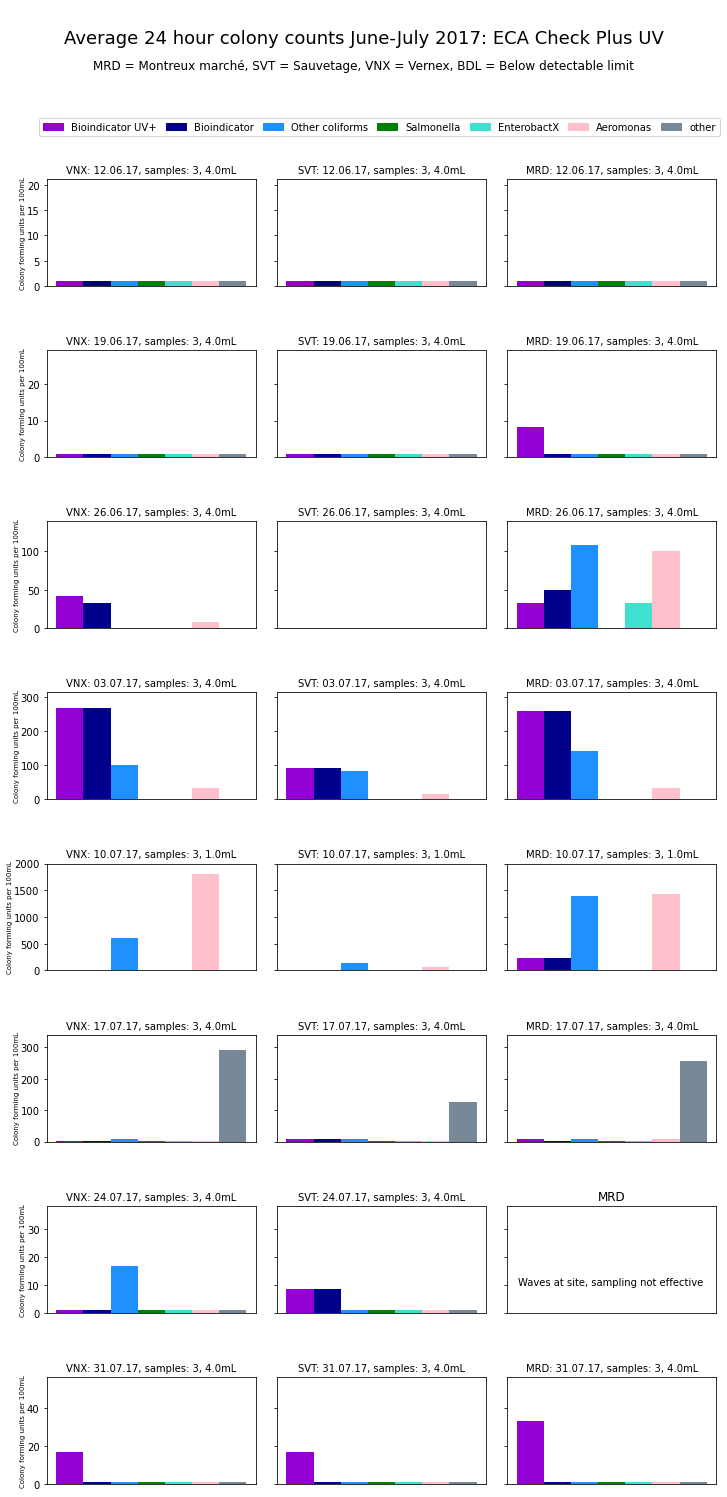

In [42]:
plot_ez_totals(theOutput, 7, "data/charts/2017_BARCHART_ARRAY.svg", "data/charts/2017_BARCHART_ARRAY.png", title, subTitle, colors, speciesColor)

## Adjust for 2016 data

### Get the data:

#### This data has already been transformed

1. Dates formatted
2. Duplicates removed
3. Errors corrected

#### see the workbook "Initial sorting and cat herding"

In [43]:
c = pd.read_csv('data/2016_Data.csv')

### Create the categories/cirteria for analysis/comparison

1. Create labels for chart output
2. Link column names to chart labels
2. Create lists of unique values for categories/criteria

#### Get the unique dates:

In [44]:
dates16 = list(c.Date.unique())
dates16.sort()
dates16

['2016-06-21',
 '2016-06-28',
 '2016-07-05',
 '2016-07-12',
 '2016-07-19',
 '2016-07-26',
 '2016-08-02',
 '2016-08-09']

#### Get the locations of interest:

In [45]:
locations

['VNX', 'SVT', 'MRD']

#### Get the culture mediums:

In [46]:
medium16 = ['easy_gel']
medium16

['easy_gel']

#### Get the 24hour results:

In [47]:
twntyFor2016 = c

#### Get the 48hour results:

In [48]:
# none

#### Create week labels and categories

In [49]:
weeksDates16 = dict(zip(weekLabels, dates16))
# inverse this relationship 
datesWeeks16 = {value:key for key, value in weeksDates16.items()}

#### Create labels for colony colors

1. Make a dictionary that ties column name to color
2. Eliminate the plate reference
3. Used to label charts

In [50]:
platesColors16 = ['P1_24h_big_blue', 'P1_24h_med_blue','P1_24h_other', 'P1_24h_pink', 'P1_24h_turq', 'P1_qty_sample',
                  'P2_24h_big_blue', 'P2_24h_med_blue', 'P2_24h_other', 'P2_24h_pink','P2_24h_turq', 'P3_24h_big_blue', 'P3_24h_med_blue', 'P3_24h_other',
                  'P3_24h_pink', 'P3_24h_turq']
platesColorsKeys16 = makeKeys(platesColors16) 

In [51]:
platesColorsKeys16['P1_24h_other']

'other'

#### Group plates by number and species

1. We need to get the average of results from three different plates for the same species
2. This needs to be iterable and indexable

#### Group the plates by plate number

In [52]:
pOne24 = ['P1_24h_big_blue', 'P1_24h_med_blue', 'P1_24h_turq', 'P1_24h_pink', 'P1_24h_other']
pTwo24 = ['P2_24h_big_blue', 'P2_24h_med_blue', 'P2_24h_turq', 'P2_24h_pink', 'P2_24h_other']
pThree24 = ['P3_24h_big_blue', 'P3_24h_med_blue', 'P3_24h_turq', 'P3_24h_pink', 'P3_24h_other']
platesTwentyFour16 = [pOne24, pTwo24, pThree24]

#### Group the species(color) 

In [53]:
twentyFourPlates16 = makeGroups(platesTwentyFour16)

#### Example: the output should be all the plate counts for one color

1. We use this to call the columns on a given day
2. Then average the results for the three columns

In [54]:
twentyFourPlates16[1]

['P1_24h_med_blue', 'P2_24h_med_blue', 'P3_24h_med_blue']

#### Limit the dataframe to the location and culture medium desired

1. 2016 data has only one culture medium - "easy-gel"

In [55]:
# functions that reduce the Data set to a specific location 
# Returns a DataFrame where each row is a unique date

def getLocation(df, places):
    b = df[df.Location == places]
    return b
def getWeeklyValues(df, week):
    d = []
    for a,b in enumerate(week):
        c = df[df.Date == week[a]]
        d.append(c)
    return d
# This function calls the other functions to produce the desired output
# a list of dataframes, each dataFrame is one row of data that contains the values
# for a specified day. location and culture medium
def getItAll16(df, places, week):
    a = getLocation(df, places)
    d = getWeeklyValues(a, week)
    return d

x16 = getItAll16(c, locations[2], dates16)   

In [56]:
# here we are just calling the columns that represent the sorting criteria
# there are 72 columns in all
# "x" will be passed on to the next set of functions
x16[1][["Date", "Location"]]

,Date,Location
4,2016-06-28,MRD


#### Use the results from the above functions and retrieve key information and perform calculations: 

1. ~~Retrieve comments from sampling and counting~~
2. Get the average color/day/location 
3. Identify "Below detectable limit" and "Too many to count"
4. Put that all in a dictionary to be exported in JSON format



In [57]:
# In 2016 there were three samples per sampleday
# get the value and store it in a dictionary
def getNumberOfSamples16(a):
    f = {}
    for b in a:
        c = 3
        d = b.Date.item()
        e = {d:c}
        f.update(e)
    return f

# Get the average per color group, per day
# Call the species groups ie.. fortyEightPlates
# Iterate through the species groups
# Averge the values greater than zero
# Identify those values = zero and store in a dictionary "Below detecable limit"
# Colors with BDL are given a nominal value of 1 (that way there will be a hint of color on the chart)
# Store all results in a dicitionary where the keys are the unique dates

def getAverage(plates,data):
    c = np.arange(len(plates))
    d = np.arange(len(data))
    e = {0.4: 250, 0.5:200, 1:100, 4:25}
    f = {}
    for g in d:
        h = data[g]["Date"].item()
        i = data[g]['P1_qty_sample'].item()
        r = data[g]["Location"].item()
        j = e[i]
        k = {h:{}}
        o = {"BDL":[]}
        s = {"Qty plated":i}
        aves = {"Averages":[]}
        for l in c:
            m = data[g][plates[l]].mean(axis=1).item()
            p = platesColorsKeys[plates[l][0]]
            ave = m*j            
            if ave == 0:
                o["BDL"].append(p)
                ave += 1
            aves["Averages"].append(ave)         
        k[h].update(aves)
        k[h].update(o)
        k[h].update(s)
        f.update(k)
    q = {r:f}
    return q

# A function for converting the dates to week numbers
def dateToWeek(a):
    f = {}
    for b,c in a.items():
        d = datesWeeks[b]
        e = {d:c}
        f.update(e)
    return f  

#### Example: Number of samples

In [58]:
numberOfSamples16 = getNumberOfSamples16(x16)
numberOfSamples16

{'2016-06-21': 3,
 '2016-06-28': 3,
 '2016-07-05': 3,
 '2016-07-12': 3,
 '2016-07-19': 3,
 '2016-07-26': 3,
 '2016-08-02': 3,
 '2016-08-09': 3}

#### Example: Daily averages 

In [59]:
theResults16 = getAverage(platesTwentyFour16 , x16)
theResults16['MRD']['2016-06-28']

{'Averages': [145.0, 25.0, 125.0], 'BDL': [], 'Qty plated': 4.0}

### Putting it all together

1. Combine all the results for each location and sample day
2. Use a dictionary format where the key is location
3. Create bar-chart array
4. Export to JSON create Web output

#### combine all the results and iterate through the locations

1. Create one dictionary per culture medium

In [60]:
def getAllLocations16(df, places, dates):
    a = {}
    b = np.arange(len(places))
    for c in b:
        d = getItAll16(df, places[c], dates)
        e = {places[c]:d}
        a.update(e)
    return a
allResults16 = getAllLocations16(c, locations, dates16)

In [61]:
def makeOutput16(data, places, plates):
    f = {}
    for i,n in enumerate(places):
        a = data[n]
        b = getAverage(plates, a)
        e = getNumberOfSamples16(a)
        g = list(b[n].keys())
        for date  in g:
            b[n][date].update({"Number of Samples":e[date]})           
        f.update(b)
    return f
theOutput16 = makeOutput16(allResults16, locations,twentyFourPlates16)

In [62]:
theOutput16["MRD"]['2016-06-21']

{'Averages': [66.66666666666666,
  466.6666666666667,
  100.0,
  266.66666666666663,
  1.0],
 'BDL': ['other'],
 'Qty plated': 1.0,
 'Number of Samples': 3}

## 2016   Create a graph that displays the average colony counts per day & location 
1. Identify and note "Below detectable limit"
2. Create a matrix Row = sample day, column = location
3. Note the days and locations samples were not taken
4. Make output SVG for web applications



In [63]:
# start the function
def plot_ez_totals16(x, bars, svgtitle, pngtitle, title, subtitle, colors, legendColors):
    # number of rows depends on the number of weeks
    rows = len(dates16)
    # the number of columns depends on the number of locations
    cols = len(x)
    # this is the number of bars in each chart
    # this depends on the number of color groups
    ind = np.arange(bars)#<--- this can be made a variable
    # the width of each bar
    # width one means there is no space between bars
    width = 1
    # assign appropriate colors per grop
    # note the index number of each color matches the index number of the values from the first fucntion
    colss = colors
    # set up the figure and the array of charts
    f, axar = plt.subplots(rows, cols, figsize=(12,24), sharey='row')
    # create some space in between the rows for x axis labels, and titles
    f.subplots_adjust(hspace=0.6, wspace=0.1)
    # run through the results generated by the previous fucntion
    
    Ylim = np.zeros([rows, cols])
    for i in np.arange(cols):
        a = i
        b = locations[a]
        c = x[b]
        d = datesWeeks16[dates16[a]]
        for n,day in enumerate(dates16):
            Ylim[n, i] = max(c[day]["Averages"])
            if i == 0:
                axar[n, i].bar(ind, c[day]["Averages"], width, color=colss)
                axar[n, i].set_title(b + ': ' +  day + ', samples: ' + str(c[day]['Number of Samples']) + ', ' +
                                 str(c[day]['Qty plated'])+ 'mL', fontdict={'fontsize': 10, 'fontweight': 'medium'})
                labels =  ", ".join(c[day]["BDL"])
                axis_label = textwrap.fill(labels, width=30)
                axar[n, i].set_ylabel("Colony forming units per 100mL", fontdict={'fontsize': 7, 'fontweight': 'medium'},
                                      labelpad=1,)
                #axar[n, i].set_xlabel('BDL : '+ str(axis_label))
                axar[n, i].xaxis.set_major_locator(plt.NullLocator())
                axar[n, i].xaxis.set_major_formatter(plt.NullFormatter())
            else:
                axar[n, i].bar(ind, c[day]["Averages"], width, color=colss)
                axar[n, i].set_title(b + ': ' +  day + ', samples: ' + str(c[day]['Number of Samples']) + ', ' +
                                 str(c[day]['Qty plated'])+ 'mL', fontdict={'fontsize': 10, 'fontweight': 'medium'})
                labels =  ", ".join(c[day]["BDL"])
                axis_label = textwrap.fill(labels, width=30)
                #axar[n, i].set_xlabel('BDL : '+ str(axis_label))
                axar[n, i].xaxis.set_major_locator(plt.NullLocator())
                axar[n, i].xaxis.set_major_formatter(plt.NullFormatter())
    plt.annotate(title, xy=(0.5, .98),  xycoords="figure fraction",                 
                 size=18, ha='center', va="top")
    plt.annotate(subtitle, xy=(0.5, .96),  xycoords="figure fraction",                 
                 size=12, ha='center', va="top")
    
    YlimMax = Ylim.max(axis=1)
    for i in np.arange(cols):
        for n,day in enumerate(dates16):
            axar[n, i].set_ylim(0,  YlimMax[n] + 50)
   
    def makePatches(colors, legendColors):
        a = []
        for i,b in enumerate(colors):
            c = mpatches.Patch(color=colors[i], label=legendColors[i])
            a.append(c)
        return a
        
    plt.legend(handles=makePatches(colors, legendColors),bbox_to_anchor=(0.11,.87, .8, .08),
               mode="expand",loc="center", ncol=len(colors), bbox_transform=f.transFigure )
    plt.savefig(svgtitle)
    plt.show()
    plt.close()

#### Define the variables for the charting function

1. Correlate species to color
2. Identify the colors you are going to use
3. Make a title
4. Make a subtitle

In [64]:
speciesColor16 = ['Bioindicator','Other coliforms', 'Salmonella','Aeromonas','other',]
colors16 = ['darkblue', 'dodgerblue', 'turquoise', 'pink', 'lightslategray']
title16 = "Average 24 hour colony counts June-August 2016: ECA Check"
subTitle16 = ""

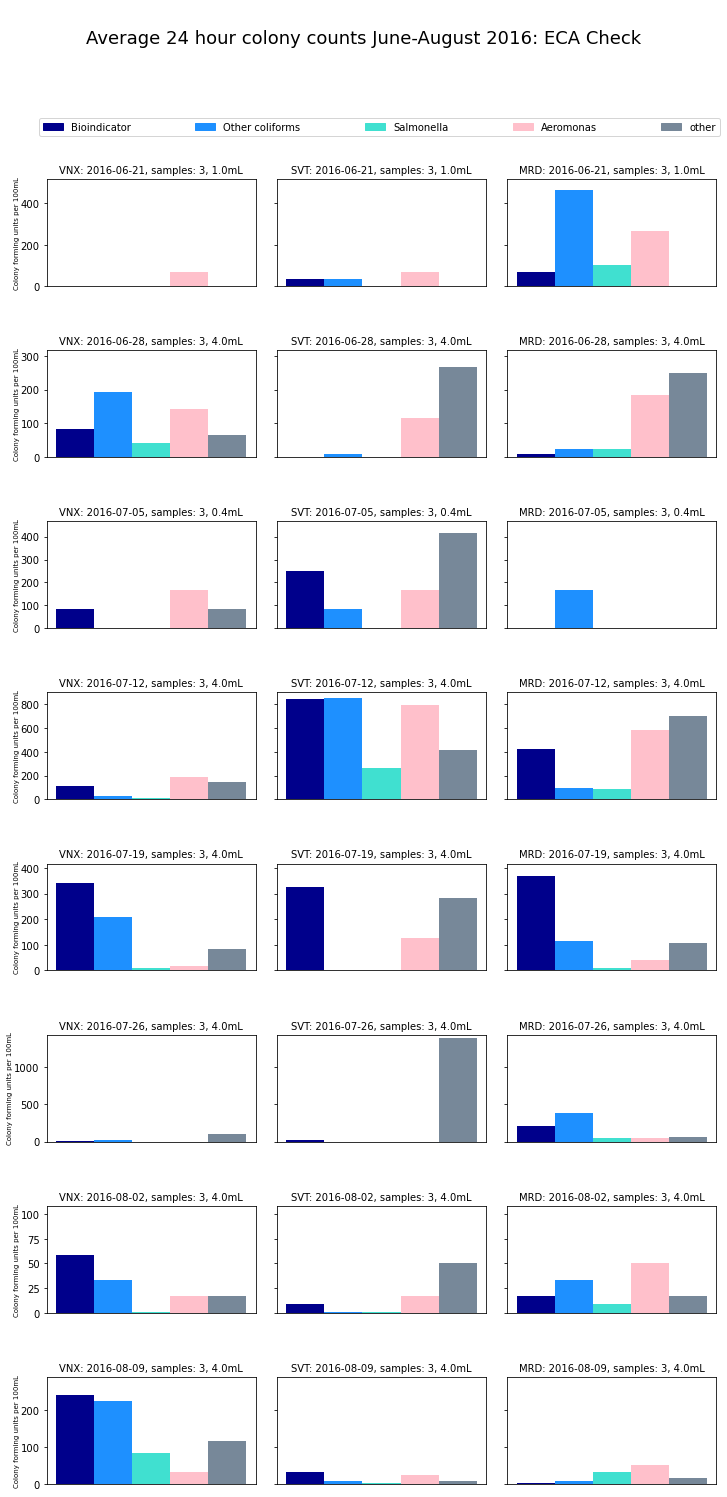

In [65]:
plot_ez_totals16(theOutput16, 5, "data/charts/2016_BARCHART_ARRAY.svg", "new2016.png", title16, subTitle16, colors16, speciesColor16)

In [66]:
theOutput16

{'VNX': {'2016-06-21': {'Averages': [1.0, 1.0, 1.0, 66.66666666666666, 1.0],
   'BDL': ['big_blue', 'med_blue', 'turq', 'other'],
   'Qty plated': 1.0,
   'Number of Samples': 3},
  '2016-06-28': {'Averages': [83.33333333333334,
    191.66666666666669,
    41.66666666666667,
    141.66666666666669,
    66.66666666666666],
   'BDL': [],
   'Qty plated': 4.0,
   'Number of Samples': 3},
  '2016-07-05': {'Averages': [83.33333333333333,
    1.0,
    1.0,
    166.66666666666666,
    83.33333333333333],
   'BDL': ['med_blue', 'turq'],
   'Qty plated': 0.4,
   'Number of Samples': 3},
  '2016-07-12': {'Averages': [116.66666666666667,
    25.0,
    8.333333333333332,
    191.66666666666669,
    150.0],
   'BDL': [],
   'Qty plated': 4.0,
   'Number of Samples': 3},
  '2016-07-19': {'Averages': [341.66666666666663,
    208.33333333333334,
    8.333333333333332,
    16.666666666666664,
    83.33333333333334],
   'BDL': [],
   'Qty plated': 4.0,
   'Number of Samples': 3},
  '2016-07-26': {'Avera

## Get the 2020 data

In [77]:
df_2020 = pd.read_csv('data/2020_Data.csv')
df_2020

,Date,Location,medium,Plate_number,Image,volume,green_met,purple,mauve,pink,other,tmtc,comments,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2020-06-11,Echandens,LB,1.0,IMG_9308.JPG,0.2,NaN,NaN,NaN,NaN,500.0,False,"TMTC really, but can estimate, with at least 4...",NaN,NaN,NaN,NaN
1,2020-06-11,Echandens,levine,1.0,IMG_9309.JPG,0.2,50.0,103.0,34.0,3.0,250.0,False,"not really TMTC! But lots, and guesstimate",NaN,NaN,NaN,NaN
2,2020-06-11,VNX,LB,1.0,IMG_9310.JPG,1.0,NaN,NaN,NaN,NaN,23.0,False,"3 types yellow, white beige - cut in agar",NaN,NaN,NaN,NaN
3,2020-06-11,VNX,levine,1.0,IMG_9311.JPG,1.0,0.0,25.0,7.0,0.0,2.0,False,"plates too wet… smears - lawn basically, but a...",NaN,NaN,NaN,NaN
4,2020-06-11,VNX,levine,2.0,IMG_9312.JPG,1.0,0.0,8.0,7.0,0.0,1.0,False,big smear with more purple too,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2020-08-06,MRD,levine,2.0,IMG_1010.JPG,1.0,0.0,3.0,5.0,7.0,21.0,False,NaN,NaN,NaN,NaN,NaN
145,2020-08-06,MRD,levine,3.0,IMG_1011.JPG,1.0,0.0,2.0,4.0,5.0,23.0,False,NaN,NaN,NaN,NaN,NaN
146,2020-08-06,Fountain@Sauvetage,LB,1.0,IMG_1005.JPG,1.0,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,NaN
147,2020-08-06,Fountain@Sauvetage,levine,1.0,IMG_1006.JPG,1.0,0.0,0.0,0.0,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN


In [76]:
theOutput16.keys(), theOutput16['VNX'].keys(), theOutput16['VNX']['2016-06-28'].keys()

(dict_keys(['VNX', 'SVT', 'MRD']),
 dict_keys(['2016-06-21', '2016-06-28', '2016-07-05', '2016-07-12', '2016-07-19', '2016-07-26', '2016-08-02', '2016-08-09']),
 dict_keys(['Averages', 'BDL', 'Qty plated', 'Number of Samples']),
 [])

In [78]:
theOutput16['VNX']['2016-06-28']['BDL'], theOutput16['VNX']['2016-06-28']['Qty plated'], theOutput16['VNX']['2016-06-28']['Number of Samples']

([], 4.0, 3)

## Export to JSON

In [67]:
def make_json(a, b):
    with open(a, 'wb') as f:
        f.write(json.dumps(b).encode('utf-8'))

In [68]:
make_json("data/JSON/APP_OUTPUT/barchartsArrays2017.json", theOutput)
make_json("data/JSON/APP_OUTPUT/barchartsArrays2016.json",theOutput16)